# Data Exploration
## Tweets dataset before cleaning

First step is to import the necessary libraries, create the dataframe and change the datatype of the datetime columns

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('float_format', '{:.2f}'.format)         #Display comma separator for thousands and 2 decimals

file_name = '2900_per_day'
#Create DataFrame with raw dataset, in order to analyse all the original scrapped tweets
df = pd.read_csv(file_name + '.csv')

#Change datatype to datetime
df['user_created_at'] = pd.to_datetime(df['user_created_at']).dt.date
df['user_created_at'] = pd.to_datetime(df['user_created_at']).dt.normalize()

#Change datatype to datetime
df['date'] = pd.to_datetime(df['date']).dt.date
df['date'] = pd.to_datetime(df['date']).dt.normalize()
print(df.head(3))
print(df.tail(3))

                      id       date  \
0 1310000000000000000.00 2020-02-10   
1 1310000000000000000.00 2020-02-10   
2 1310000000000000000.00 2020-02-10   

                                                                                                                                                                                                                                                                                                           text  \
0                                                                  Nearly one month before the US election president Trump is transferred by helicopter to hospital where he is expected to work for the “next few days” after contracting #COVID19 and developing a fever. #potuscovid https://t.co/bpGmPSsKYq   
1  @notthebeendall @notthebeendall  This fundraiser was actually \nat #Bedminster, NJ  ... \nI am amazed that they went thru with this event,\nknowing that #Trump had active #Covid at the time. \nI don't know if the guests signed

### Dataframe Shape
Now we can print the shape of the dataframe, where the total rows are 52200 (2990 tweets during 18 days) and 12 columns

In [62]:
print(df.shape)

(52200, 12)


### Dataframe Info
In the dataframe info it can be seen that only the 'location' column has Null rows.
There are also two datetime columns which were previously converted into datetime64.

In [63]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52200 entries, 0 to 52199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52200 non-null  float64
 1   date                   52200 non-null  object 
 2   text                   52200 non-null  object 
 3   user                   52200 non-null  object 
 4   location               36617 non-null  object 
 5   retweet_count          52200 non-null  int64  
 6   source                 52184 non-null  object 
 7   user_friends_count     52200 non-null  int64  
 8   user_followers_count   52200 non-null  int64  
 9   user_created_at        52200 non-null  object 
 10  user_listed_count      52200 non-null  int64  
 11  user_favourites_count  52200 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 4.8+ MB
None


### Date Column Description
Getting the 'date' column description and its quartiles (which does not help here since the data is equaly distributed with 2900 tweets per day during 19 days).
First Tweet was posted on 02/10/2020.
Last tweet was posted on 19/10/2020.


In [67]:
#Get Time Frame of Data Set
print("Date Column Description")
print(df['date'].describe(datetime_is_numeric=True))
print("\n")

Date Column Description
count                  52200
mean     2020-10-10 12:00:00
min      2020-10-02 00:00:00
25%      2020-10-06 00:00:00
50%      2020-10-10 12:00:00
75%      2020-10-15 00:00:00
max      2020-10-19 00:00:00
Name: date, dtype: object




### User Column Description
Certain usernames were repeated many times in the dataframe which made me curious about them, after all, 900 posts related to trump and covid in 19 days is quite suspicious. After checking the first user profile on Twitter, I realized it is a news profile, which is likely to use bots.

In [70]:
#Get Description and Unique Values from User Column
print(df['user'].describe(), "\n")
print("User Value Counts Top 10")
print(df['user'].value_counts().head(10))

count               52200
unique              23961
top       CupofJoeintheD2
freq                  900
Name: user, dtype: object 

User Value Counts Top 10
CupofJoeintheD2    900
DuRoRoDu           542
HenryAl07332400    428
ppl4justice        422
Hotpage_News       368
GlobalPandemics    325
alfysantillana     322
BigdogFnh          322
palazzo214         313
DenmarkRepent      190
Name: user, dtype: int64


### Location description
The location column is the only column with NULL values, where the U.S. is the most frequent place, followed by "In the "D"", which belongs to the before mentioned news account. When having a look at the first 10 locations, 8 of them belong to the U.S. territory. In total, the first 10 locations represent the 18.4% of the locations column.

In [71]:
#Location Description
print(df['location'].describe(), "\n")
print(df['location'].value_counts().head(10))


count             36617
unique             7979
top       United States
freq               2101
Name: location, dtype: object 

United States              2101
In the "D"                  900
USA                         745
United States of Corona     542
Florida, USA                541
Washington, DC              509
New York, NY                502
California, USA             474
WORLDWIDE                   406
Miami, FL                   382
Name: location, dtype: int64


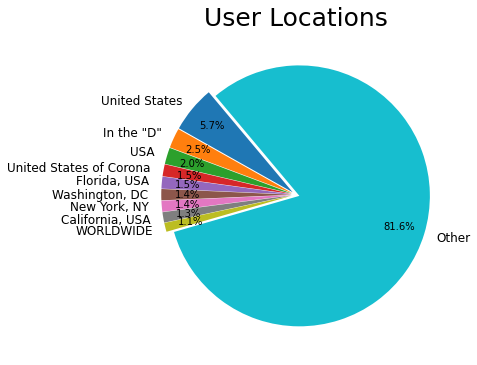

In [72]:
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=15
locations = df['location'].value_counts()
locations2 = locations.iloc[:9]
locations2.loc['Other'] = locations.iloc[9:].sum()

pie, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
plt.pie(locations2.values, labels=locations2.index, autopct="%1.1f%%", 
        explode=[0.03]*10, pctdistance=0.8, startangle=130)
plt.title("User Locations", fontsize=25)

plt.show()

### Retweet Count Descriptive Statistics
The tweets in the dataset were, in average, retweeted 5.66 times each. The most retweeted tweet has a retweet count of 15024 and it belongs to the following tweet: 
"Your president QUICKLY wished Trump recovery from COVID19, yet 10 Nigerians have been killed in the last 2 days while demanding that #SARSMUSTEND and NOT A WORD FROM THE PRESIDENCY.

They don't rate you, they think you're just a Twitter warrior." on 11/10/2020 by user "aproko_doctor"

In [74]:
print(df['retweet_count'].describe())

count   52200.00
mean        5.66
std       129.55
min         0.00
25%         0.00
50%         0.00
75%         0.00
max     15024.00
Name: retweet_count, dtype: float64


### Source column Description
The most used source for posting was the "Twitter Web App" with a frequency of 20250 in the dataset. However, there are 183 different sources which include "Twitter for iPhone" and "Twitter for Android" among others.

In [76]:
print(df['source'].describe())

count               52184
unique                183
top       Twitter Web App
freq                20250
Name: source, dtype: object


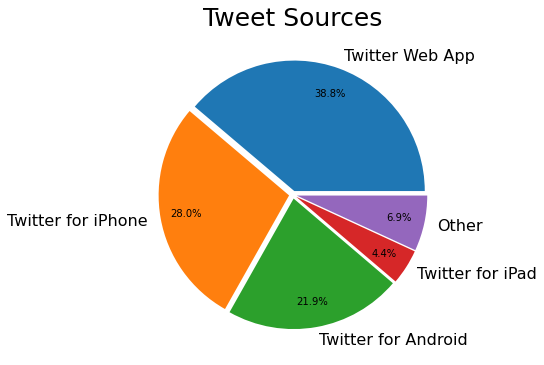

In [77]:
sources = df['source'].value_counts()
sources2 = sources.iloc[:4]
sources2.loc['Other'] = sources.iloc[4:].sum()

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=15

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(sources2.values, labels=sources2.index, autopct="%.1f%%", 
        explode=[0.03]*5, pctdistance=0.8)
plt.title("Tweet Sources", fontsize=25)
plt.show()

### User Friends Count Description

In [78]:
print(df['user_friends_count'].describe())

User Friends Count Descriptive Statistics
count    52200.00
mean      3258.43
std      12303.00
min          0.00
25%        204.00
50%        878.00
75%       3065.25
max     621414.00
Name: user_friends_count, dtype: float64


### User Followers Count

In [79]:
#User Followers Count
print("User Followers Count Descriptive Statistics")
print(df['user_followers_count'].describe())


User Followers Count Descriptive Statistics
count      52200.00
mean       27322.56
std       380713.87
min            0.00
25%          111.00
50%          706.00
75%         3300.00
max     22480462.00
Name: user_followers_count, dtype: float64


### User Created At Description

In [80]:
print("User Created At Column Description")
print(df['user_created_at'].describe(datetime_is_numeric=True), "\n")

print("User Created at Descriptive Statistics")
print("Oldest User on Data Set: " + str(df['user_created_at'].min()))
print("Newest User on Data Set: " + str(df['user_created_at'].max()))
print("Mean:                    " + str(df['user_created_at'].mean()))

User Created At Column Description
count                            52200
mean     2014-05-27 02:11:08.689655296
min                2006-03-12 00:00:00
25%                2010-07-13 00:00:00
50%                2013-10-23 00:00:00
75%                2018-06-27 00:00:00
max                2020-12-10 00:00:00
Name: user_created_at, dtype: object 

User Created at Descriptive Statistics
Oldest User on Data Set: 2006-03-12 00:00:00
Newest User on Data Set: 2020-12-10 00:00:00
Mean:                    2014-05-27 02:11:08.689655296


### User Listed Count Column Description

In [81]:
#User Listed Count Column Description
print("User Listed Count Descriptive Statistics")
print(df['user_listed_count'].describe())

User Listed Count Descriptive Statistics
count    52200.00
mean       174.65
std       1360.74
min          0.00
25%          0.00
50%          5.00
75%         43.00
max     122235.00
Name: user_listed_count, dtype: float64


### User Favourites Count

In [82]:
#User Favourites Count
print("User Favourites Count Descriptive Statistics")
print(df['user_favourites_count'].describe())

User Favourites Count Descriptive Statistics
count     52200.00
mean      30567.92
std       66469.42
min           0.00
25%        1163.00
50%        7497.50
75%       28770.00
max     1400095.00
Name: user_favourites_count, dtype: float64
